<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

ПРОЕКТ Защита персональных данных клиентов

**Задача:**  защитить данные клиентов страховой компании «Хоть потоп»

**Цель:** разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию

**Данные:** количество страховых выплат клиенту и его признаки за последние 5 лет

**Действия:** Проверим данные, выявим признаки и целевые признаки, создадим модель для обучения, посчитаем качественную метрику R2 для исходной и преобразованной матриц

## Загрузка данных

In [19]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [12]:
# загрузим и изучим данные

data = pd.read_csv('/datasets/insurance.csv')
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [13]:
data.info()

# пропусков в данных нет 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [14]:
# проверим уникальность значений

print(data['Пол'].unique())
print(data['Члены семьи'].unique())
print(data['Страховые выплаты'].unique())

[1 0]
[1 0 2 4 3 5 6]
[0 1 2 3 5 4]


In [15]:
# проверим наличие дубликатов

data[data.duplicated()] 

# 153 дубликата

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [16]:
#удалим дубликаты

data = data.drop_duplicates()
data.shape

(4847, 5)

In [17]:
#посмотрим на статистические даннеы

data.describe()

#средняя и медианная практически одинаковые у Возраст и  Зарплата, что говорит о небольшом уровне рассеивания

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


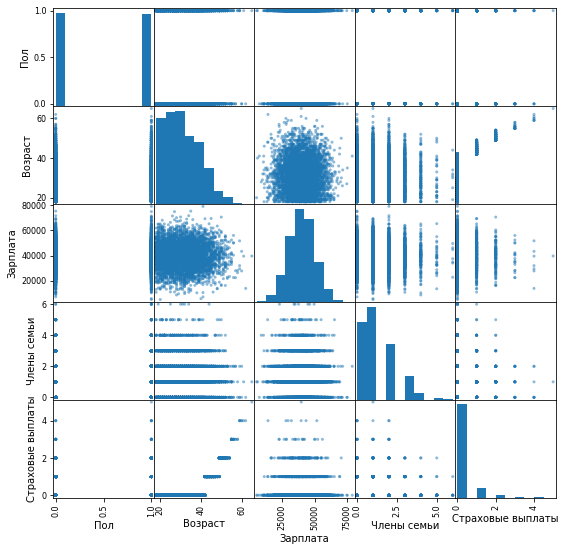

In [7]:
# построим скатерплот для всех признаков и посмотрим на имеющиеся зависимости

pd.plotting.scatter_matrix(data, figsize=(9, 9));

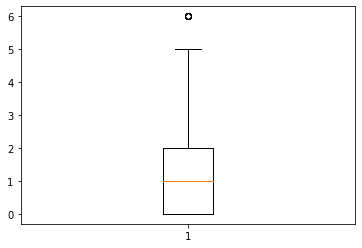

In [28]:
# Колонка Члены семьи - количественные, поэтому построим ящик с усами.

plt.boxplot(data['Члены семьи']);

# больше 50% клиентов имеет не более 2 челнов семьи

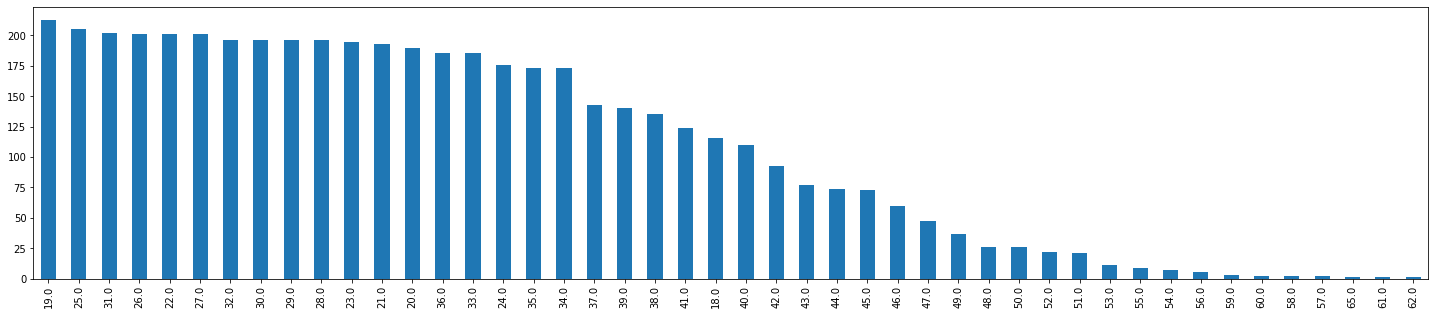

In [33]:
# построим диаграмvу для визуального восприятия 
 
data['Возраст'].value_counts().plot(kind='bar', figsize=(25, 5));

# большее кол-во от 19 до 34 лет

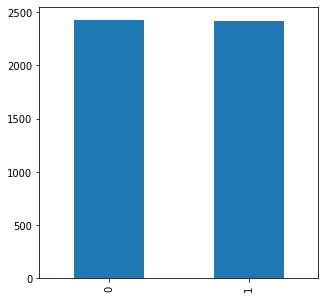

In [35]:
data['Пол'].value_counts().plot(kind='bar', figsize=(5, 5));

# пол практически в  равном соотношении

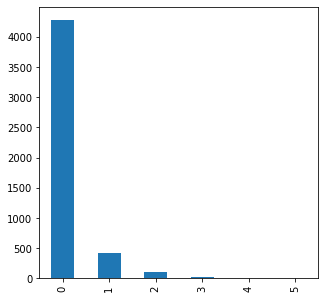

In [38]:
data['Страховые выплаты'].value_counts().plot(kind='bar', figsize=(5, 5));

#в основной массе страховые случаи не активны

### Вывод:
В предоставленных данных имеются 4 признака и 1 целевой признак
В датасете нет пропусков, но имеются дубликаты, которые мы удалили.
Построенный скатерплот не показал какой-либо зависимости между признаками.
Меньше 25% страховых случаев среди всех застрахованных за последние 5 лет

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не изменится, изменится только угол наклона w

**Обоснование:** 
докажем свое утверждение уравнением. 

Если $$w = (X^T X)^{-1} X^T y$$ , 

то при умножении матриц X= XP, 

а значит 
$$w1 = (XP^T XP)^{-1} XP^T y$$

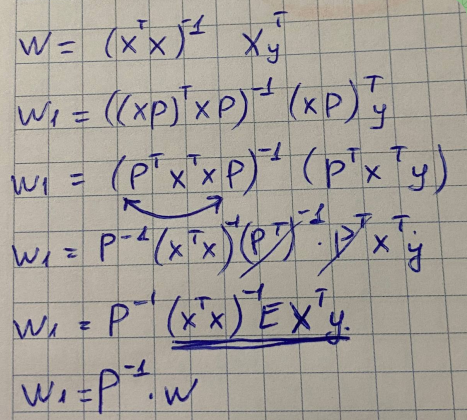
уравненеием мы доказали, что наше предказание не изменится

## Алгоритм преобразования

**Алгоритм**
Для преобразования данных нам необходимо будет создать обратимую (квадратную матрицу) 4х4, по количеству признаков в исходных данных, затем исходные признаки умножаем на полученную обратимую матрицу. 

**Обоснование**
Данные действия позволят внести преобразование в данные и при этом их не потерять. По мере написания модели мы произведем расчет метрики качества R2, чтоб убедиться, что данные после преобразования остались корректными

## Проверка алгоритма

In [39]:
# подготовоим данные для data для обучения модели

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [40]:
# создадим класс для обучения наших моделей

class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w)+self.w0

In [41]:
# начнем преобразоваyие матрицы для зашифровки персональных данных 
# сгенерируем матрицу 4*4, чтоб количество строк совпадало с кол-ом признаков в матрице с  features
# найдем обратную матрицу.Также она поможет проверить матрицу на обратимость: если матрица небратимая, то будет ошибка 

df_matrix_4 = np.random.normal(size=(4, 4))
df_matrix_invert = np.linalg.inv(df_matrix_4)
df_matrix_invert

array([[-0.62721855, -0.96686324,  0.28254746, -1.27868232],
       [-0.76706063, -0.35845988,  0.55718708, -0.77291903],
       [-0.28875303, -0.37930889,  0.6187449 , -0.7404436 ],
       [-0.34749371, -0.23933734,  0.0341621 , -1.61170062]])

In [42]:
# теперь перемножим исходные данные матрицы features на обратную сгенерированную матрицу df_matrix_invert

df_matrix_new = (features.values)@df_matrix_invert

In [43]:
# полученные данные отобразим в таблице

features_new = pd.DataFrame(df_matrix_new, columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семь'])
features_new.head()

,Пол,Возраст,Зарплата,Члены семь
0,-14354.574304,-18829.624238,30712.908368,-36760.582482
1,-11008.247283,-14430.466494,23537.970928,-28174.022668
2,-6086.058311,-7975.882127,13009.801303,-15571.730192
3,-12057.804459,-15825.187245,25813.431539,-30895.952702
4,-7558.558903,-9910.965894,16165.125648,-19348.498301


In [44]:
#создадим модель, обучим ее и рассчитаем метрику качества R2 (коэф. детерминации) для исходных данных

model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print("Метрика качества R2 исходной матрицы равна:", r2_score(target, predictions))

Метрика качества R2 исходной матрицы равна: 0.4302010044852068


In [45]:
#создадим модель, обучим ее и рассчитаем метрику качества R2 (коэф. детерминации) для преобразованных данных

model = LinearRegression()
model.fit(features_new, target)
predictions = model.predict(features_new)
print("Метрика качества R2 преобразованной матрицы равна:", r2_score(target, predictions))

Метрика качества R2 преобразованной матрицы равна: 0.43020100448520204


### Вывод:
Проведя сравнение качества моделей до и после преобразования, мы смело можем сделать вывод, что модель после преобразования не изменилась, т.к. величина метрики качества R2 (коэф. детерминации) для обеих матриц одинаковая
